Problem Statement: The goal of this project is to develop a predictive model to estimate medical insurance costs for
individuals based on factors such as age, sex, BMI, number of children, smoking status, and
residential region. This model will help insurance companies, healthcare providers, and individuals
understand how various factors impact insurance costs and enable better decision-making..

Columns in the dataset:

Age: Age of the insured individual.


Sex: Gender (male or female).


BMI: Body Mass Index (indicator of body weight relative to height).


Children: Number of dependents covered under the insurance policy.


Smoker: Whether the person smokes (yes/no).


Region: Residential region in the US (northeast, southeast, southwest,
northwest).


Charges: Target variable, indicating medical costs billed by health insurance.

In [51]:
#importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
#Loading the dataset
df = pd.read_csv("/content/Insurance_Data.csv")
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')


In [53]:
df

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,594,41,male,40.260000,0,no,southeast,5709.164400
1,306,28,female,27.500000,2,no,southwest,20177.671130
2,54,40,female,28.690000,3,no,northwest,8059.679100
3,493,61,male,43.400000,0,no,southwest,12574.049000
4,403,49,male,32.300000,3,no,northwest,10269.460000
...,...,...,...,...,...,...,...,...
100330,805,45,female,35.797071,0,no,northwest,7731.874325
100331,409,32,male,29.983046,1,no,southeast,4074.426362
100332,46,18,female,38.699206,2,no,northeast,3393.393982
100333,996,39,female,34.103542,3,no,southwest,7418.495980


In [54]:
#Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100335 entries, 0 to 100334
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100335 non-null  int64  
 1   age         100335 non-null  int64  
 2   sex         100335 non-null  object 
 3   bmi         100335 non-null  float64
 4   children    100335 non-null  int64  
 5   smoker      100335 non-null  object 
 6   region      100335 non-null  object 
 7   charges     100335 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.1+ MB


In [55]:
df.describe()

,Unnamed: 0,age,bmi,children,charges
count,100335.000000,100335.000000,100335.000000,100335.000000,100335.000000
mean,666.873504,39.308576,30.664623,1.094503,13300.844873
std,386.752495,14.030997,6.085236,1.204944,12104.365984
min,0.000000,18.000000,15.911164,0.000000,1121.824004
25%,332.000000,27.000000,26.262681,0.000000,4753.665682
50%,664.000000,39.000000,30.416948,1.000000,9391.380733
75%,1002.000000,51.000000,34.721905,2.000000,16657.757928
max,1337.000000,64.000000,53.174286,5.000000,63770.476644


In [56]:
df.shape

(100335, 8)

In [57]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [58]:
#Creating tables for each column..
charges_df = df['charges'].value_counts().reset_index()
charges_df.columns = ['Charges', 'Count']
charges_df.head()

,Charges,Count
0,1639.563100,2
1,5709.164400,1
2,2709.243443,1
3,48675.503722,1
4,13725.441822,1


In [59]:
age_df = df['age'].value_counts().reset_index()
age_df.columns = ['age', 'Count']
age_df.head()

,age,Count
0,18,5064
1,19,4965
2,45,2226
3,52,2220
4,48,2211


In [60]:
sex_df = df['sex'].value_counts().reset_index()
sex_df.columns = ['sex', 'Count']
sex_df.head()

,sex,Count
0,male,50554
1,female,49781


In [61]:
bmi_df = df['bmi'].value_counts().reset_index()
bmi_df.columns = ['bmi', 'Count']
bmi_df.head()

,bmi,Count
0,32.300,13
1,28.310,9
2,28.880,8
3,30.800,8
4,30.495,8


In [62]:
smoker_df = df['smoker'].value_counts().reset_index()
smoker_df.columns = ['smoker', 'Count']
smoker_df.head()

,smoker,Count
0,no,79812
1,yes,20523


In [63]:
region_df = df['region'].value_counts().reset_index()
region_df.columns = ['region', 'Count']
region_df.head()

,region,Count
0,southeast,27173
1,northwest,24485
2,northeast,24342
3,southwest,24335


<Axes: xlabel='age', ylabel='Count'>

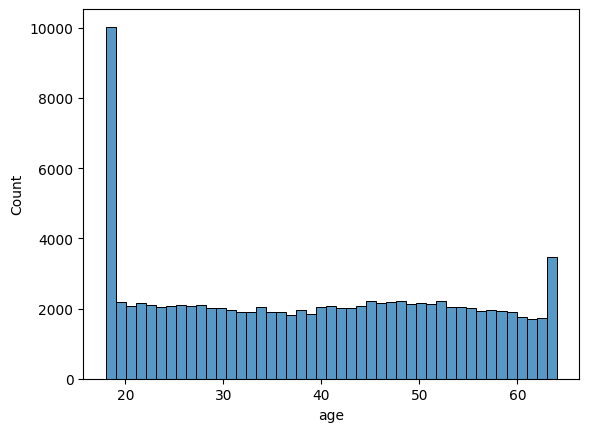

In [64]:
#Uni-Variate Analysis
sns.histplot(df['age'])

<Axes: xlabel='sex', ylabel='Count'>

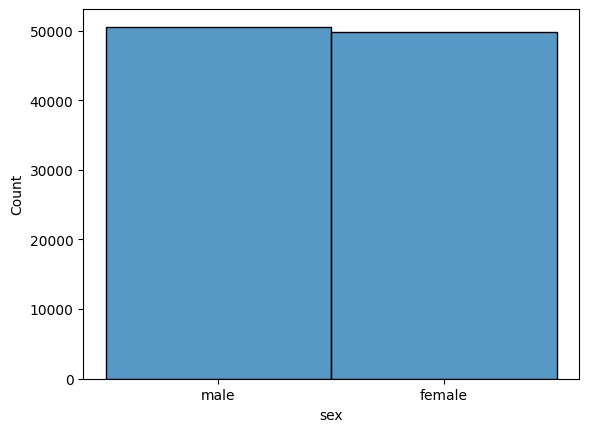

In [65]:
sns.histplot(df['sex'])

<Axes: xlabel='bmi', ylabel='Count'>

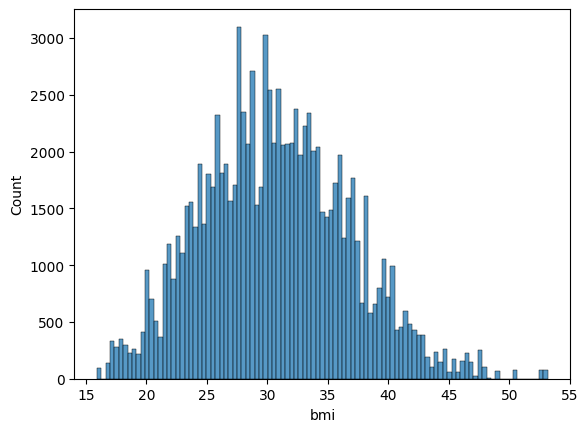

In [66]:
sns.histplot(df['bmi'])

<Axes: xlabel='children', ylabel='Count'>

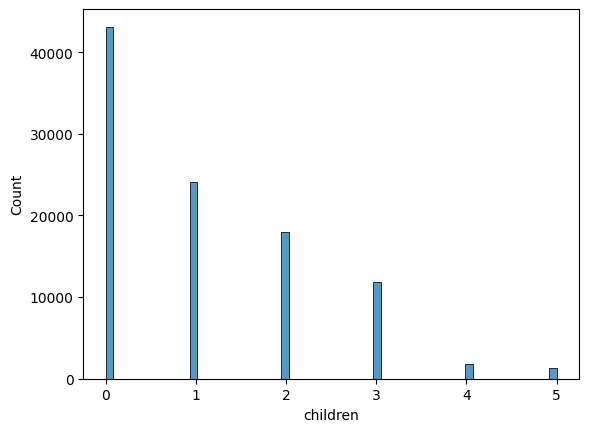

In [67]:
sns.histplot(df['children'])

<Axes: xlabel='smoker', ylabel='Count'>

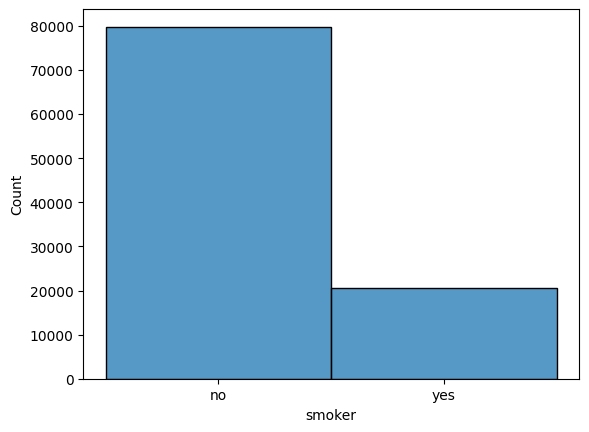

In [68]:
sns.histplot(df['smoker'])

<Axes: xlabel='region', ylabel='Count'>

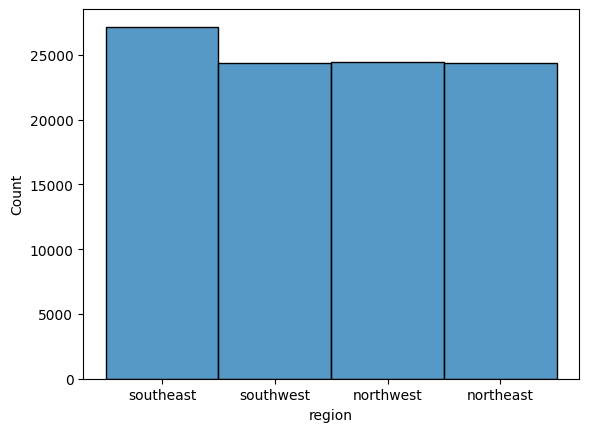

In [69]:
sns.histplot(df['region'])

<Axes: xlabel='charges', ylabel='Count'>

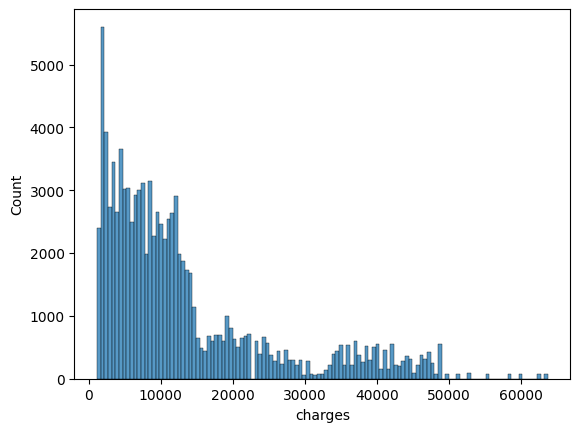

In [70]:
sns.histplot(df['charges'])

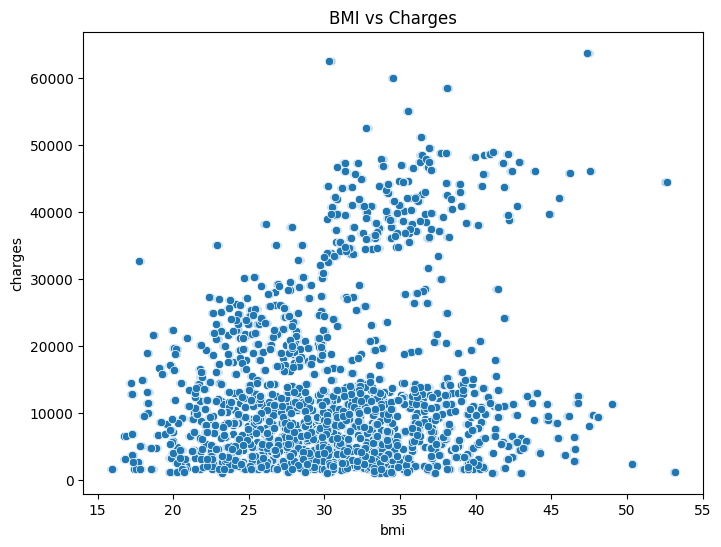

In [71]:
## ii)Bi-variate analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.show()

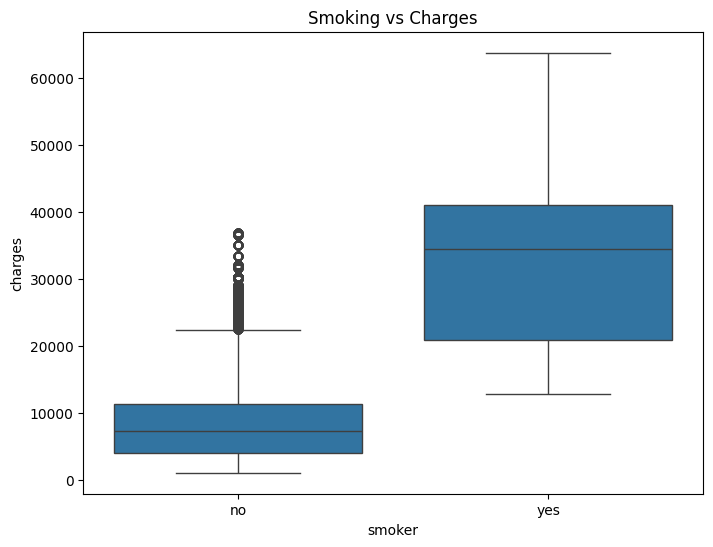

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoking vs Charges')
plt.show()

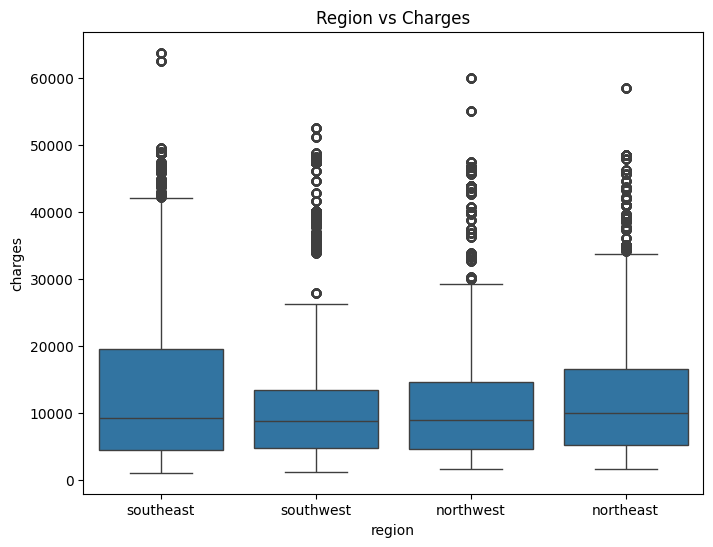

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.show()

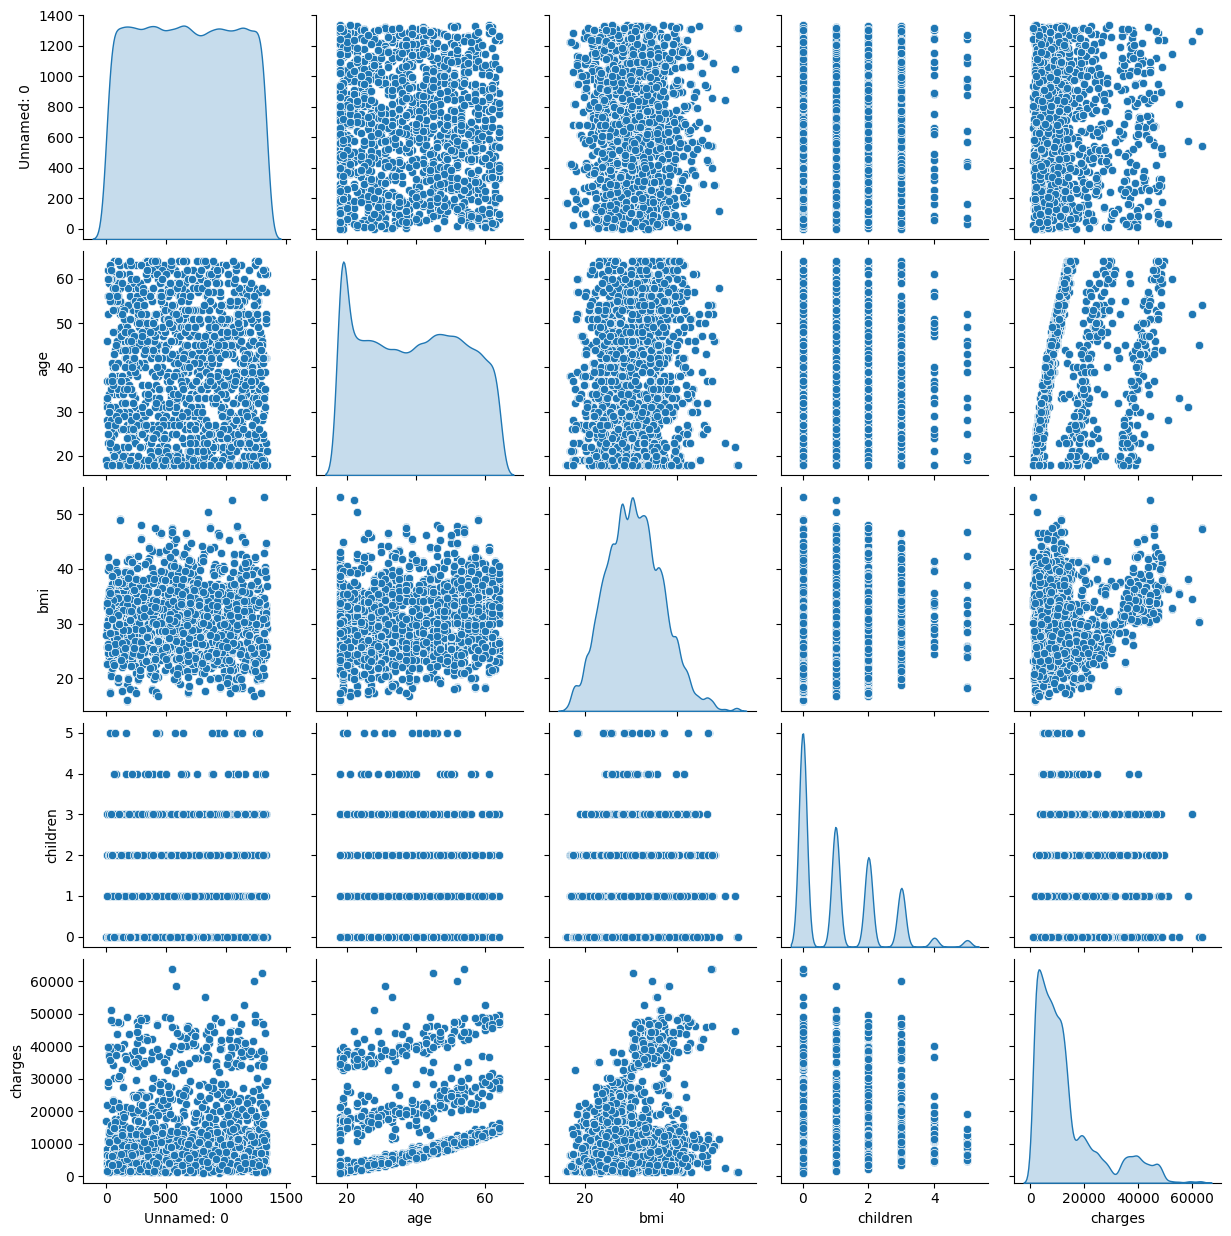

In [74]:
# Bi-variate Analysis
sns.pairplot(df, diag_kind='kde')
plt.show()

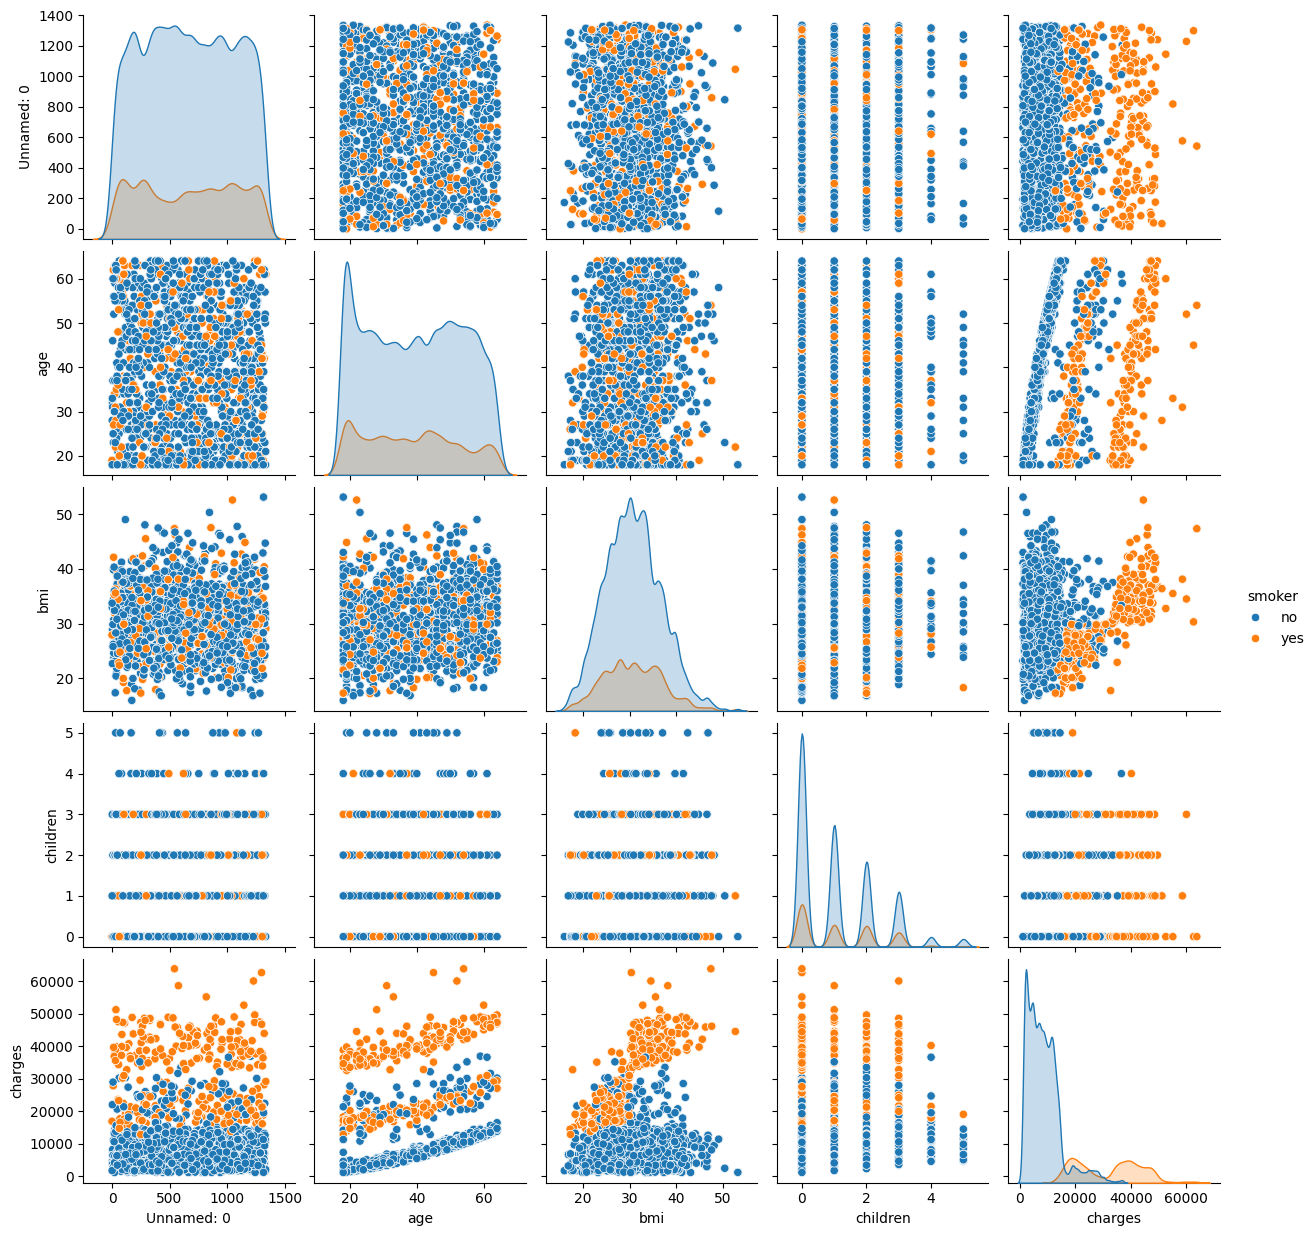

In [75]:
# Multivariate Analysis
sns.pairplot(df, hue='smoker', diag_kind='kde')
plt.show()

In [76]:
#Checking for Missing Values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64


In [77]:
# Handling Missing Values
# Replace numerical missing values with mean,median,mode
# Calculate mean for numerical columns
num_means = df.select_dtypes(include=['number']).mean()
print("Numerical Column Means:\n", num_means)

# Calculate median for numerical columns
num_medians = df.select_dtypes(include=['number']).median()
print("\nNumerical Column Medians:\n", num_medians)

# Calculate mode for numerical columns
num_modes = df.select_dtypes(include=['number']).mode().iloc[0]  # Mode returns multiple values, take the first
print("\nNumerical Column Modes:\n", num_modes)

# Calculate mode for categorical columns
cat_modes = df.select_dtypes(include=['object']).mode().iloc[0]
print("\nCategorical Column Modes:\n", cat_modes)


Numerical Column Means:
 Unnamed: 0      666.873504
age              39.308576
bmi              30.664623
children          1.094503
charges       13300.844873
dtype: float64

Numerical Column Medians:
 Unnamed: 0     664.000000
age             39.000000
bmi             30.416948
children         1.000000
charges       9391.380733
dtype: float64

Numerical Column Modes:
 Unnamed: 0     530.0000
age             18.0000
bmi             32.3000
children         0.0000
charges       1639.5631
Name: 0, dtype: float64

Categorical Column Modes:
 sex            male
smoker           no
region    southeast
Name: 0, dtype: object


In [78]:
# Dropping if missing values are less than 5%-10%
thresh = 0.1 * len(df)
df.dropna(thresh=thresh, axis=1, inplace=True)
thresh

10033.5

In [79]:
#Checking & Removing Duplicates
print("Duplicate values count:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate values count: 0


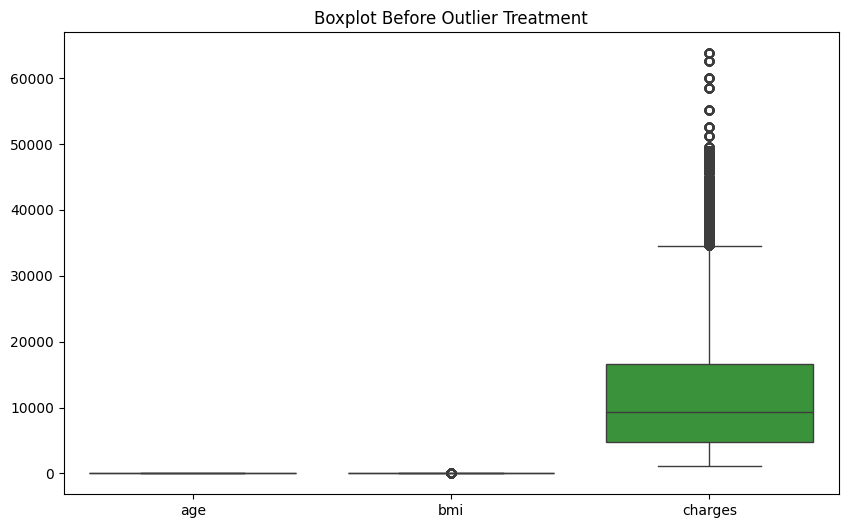

In [80]:
#Outlier Detection & Treatment
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title("Boxplot Before Outlier Treatment")
plt.show()

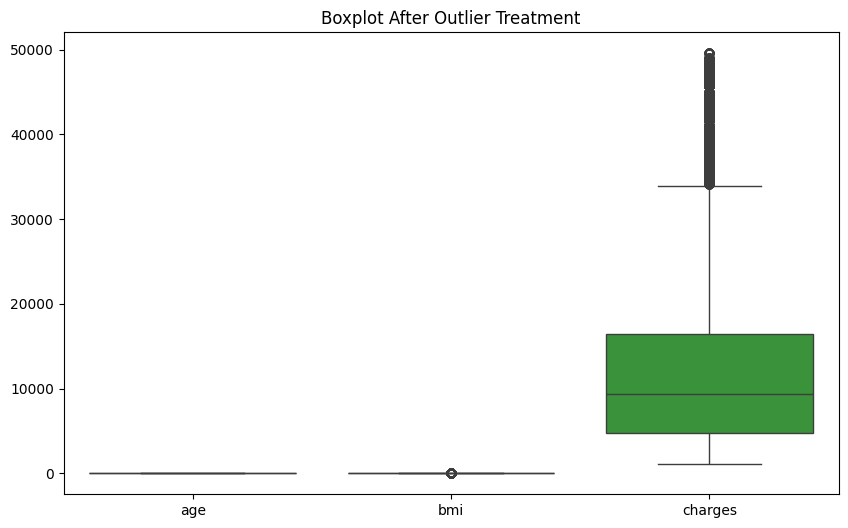

In [81]:
from scipy.stats import zscore
# Removing outliers using Z-score threshold
df = df[(np.abs(zscore(df[['age', 'bmi', 'charges']])) < 3).all(axis=1)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title("Boxplot After Outlier Treatment")
plt.show()

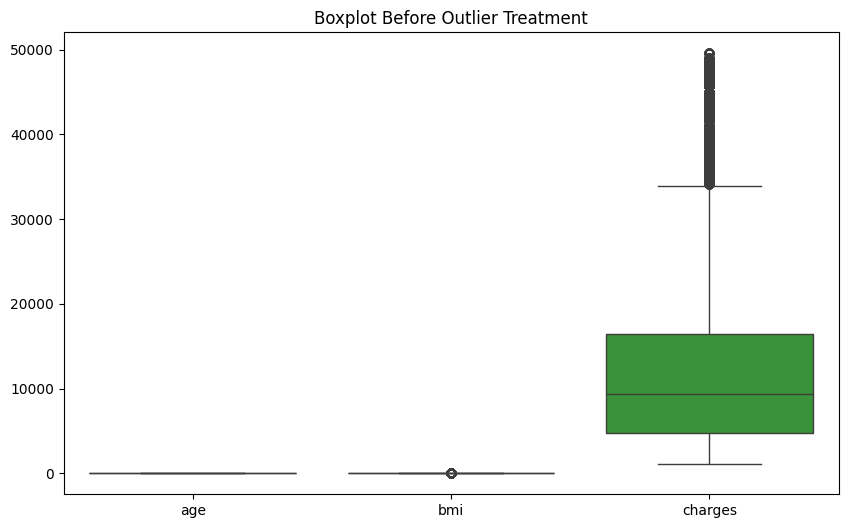

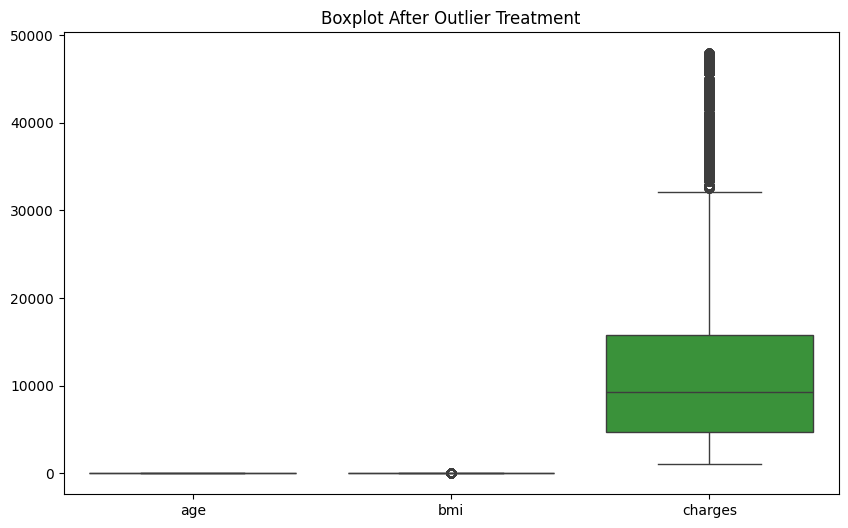

In [82]:
# making the box plot before and after the outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title("Boxplot Before Outlier Treatment")
plt.show()
df = df[(np.abs(zscore(df[['age', 'bmi', 'charges']])) < 3).all(axis=1)]
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title("Boxplot After Outlier Treatment")
plt.show()

Feature engineering


In [83]:
# a) Feature Extraction
df['age_squared'] = df['age'] ** 2  # Example feature extraction
df['bmi_age_interaction'] = df['bmi'] * df['age']

In [84]:
# b) Feature Creation
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [85]:
# Encoding categorical features
encoder = OneHotEncoder(drop='first')
categorical_cols = ['sex', 'smoker', 'region', 'bmi_category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [86]:
# c) Feature Selection
correlation = df.corr()
high_correlation_features = correlation.index[abs(correlation['charges']) > 0.1]
df = df[high_correlation_features]

Checking the multicoliniarity

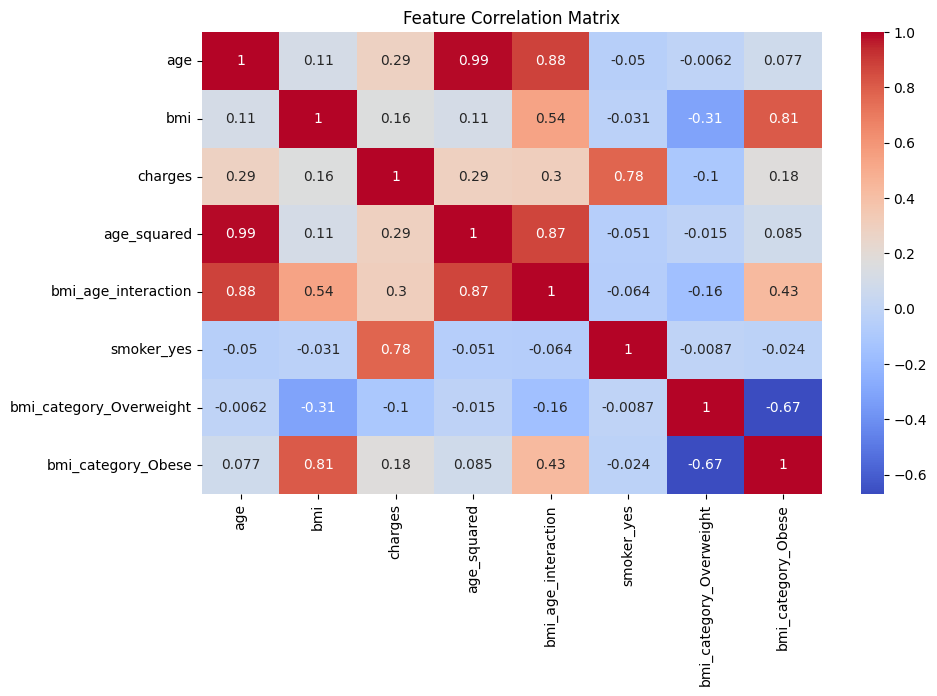

In [87]:
# heat map
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [94]:
# Variance Inflation Factor (VIF) Technique
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = df.drop(columns=['charges'])
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''